# Fit non ideal diode equation
Version 0.0.1 (c) Vincent M. Le Corre, 2022

In [1]:
# Package import
#%matplotlib notebook # switch this on when on JupyterHub
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import homemade package by VLC
from core.DiodeFit_func import *

### Fit light JV-curves to non ideal diode equation

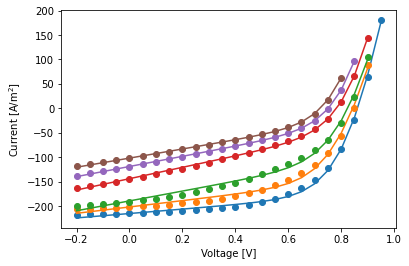

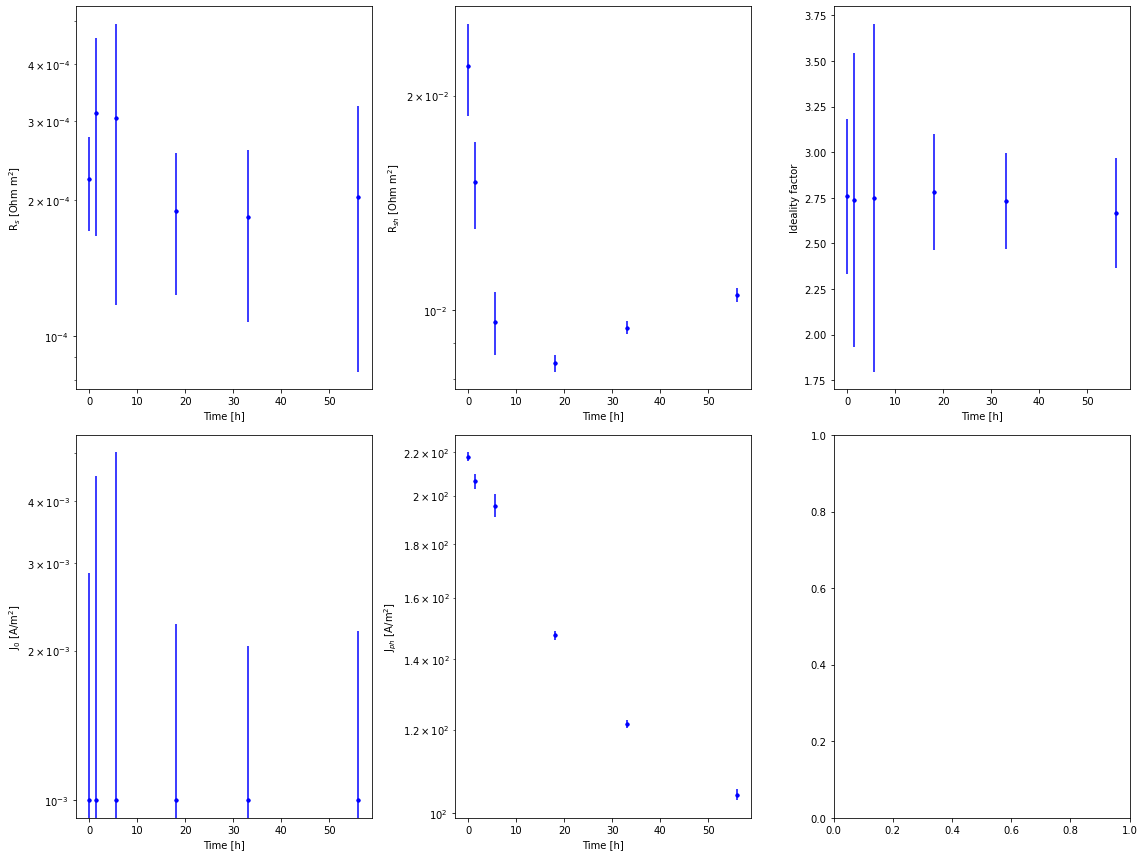

In [2]:
time2fit = ['0.000000E+0','1.500000E+0','5.500000E+0','1.800100E+1','3.300200E+1','5.600300E+1']
FolderName = 'test_data'
Rs, Rsh, J0, n, Jph, errRs, errRsh, errJ0, errn, errJph = [],[],[],[],[],[],[],[],[],[] 
idx = 0
for i in time2fit:
    df = pd.read_csv(os.path.join(FolderName,'PM6Y6_1.00e+00sun_t_'+i+'.txt'),delim_whitespace=True) # read data
    V = np.asarray(df['V'])
    J = np.asarray(df['J'])

    # Fit the non ideal diode equation
    res = FitNonIdealDiode(V,J,T=300,JV_type='light',take_log=False,bounds=([1e-20, 0.8, 1e-8, 1e-3], [1e-3, 3, 1e2, 1e8]))
    Rs.append(res['Rs'])
    Rsh.append(res['Rsh'])
    J0.append(res['J0'])
    n.append(res['n'])
    Jph.append(res['Jph'])
    errRs.append(res['Rs_err'])
    errRsh.append(res['Rsh_err'])
    errJ0.append(res['J0_err'])
    errn.append(res['n_err'])
    errJph.append(res['Jph_err'])
    t = np.asarray(time2fit)

    plt.plot(V,J,'o',c='C'+str(idx))
    plt.plot(V,NonIdealDiode_light(V,res['J0'],res['n'],res['Rs'],res['Rsh'],res['Jph']),c='C'+str(idx))
    idx += 1
plt.xlabel('Voltage [V]')
plt.ylabel('Current [A/m$^2$]')
plt.show()
t = t.astype(float)

fig, axs = plt.subplots(2, 3, figsize=(16,12))
axs[0, 0].errorbar(t, Rs, yerr=errRs, fmt='b.')
axs[0, 0].semilogy(t, Rs, 'b.', label='Rs')
axs[0, 0].set_xlabel('Time [h]')
axs[0, 0].set_ylabel('R$_s$ [Ohm m$^2$]')

axs[0, 1].errorbar(t, Rsh, yerr=errRsh, fmt='b.')
axs[0, 1].semilogy(t, Rsh, 'b.', label='Rsh')
axs[0, 1].set_xlabel('Time [h]')
axs[0, 1].set_ylabel('R$_{sh}$ [Ohm m$^2$]')

axs[0, 2].errorbar(t, n, yerr=errn, fmt='b.')
axs[0, 2].plot(t, n, 'b.', label='n')
axs[0, 2].set_xlabel('Time [h]')
axs[0, 2].set_ylabel('Ideality factor')

axs[1, 0].errorbar(t, J0, yerr=errJ0, fmt='b.')
axs[1, 0].semilogy(t, J0, 'b.', label='J0')
axs[1, 0].set_xlabel('Time [h]')
axs[1, 0].set_ylabel('J$_0$ [A/m$^2$]')

axs[1, 1].errorbar(t, Jph, yerr=errJph, fmt='b.')
axs[1, 1].semilogy(t, Jph, 'b.', label='Jph')
axs[1, 1].set_xlabel('Time [h]')
axs[1, 1].set_ylabel('J$_{ph}$ [A/m$^2$]')
plt.tight_layout()
plt.show()

### Fit non ideal diode equation to dark JV-curves

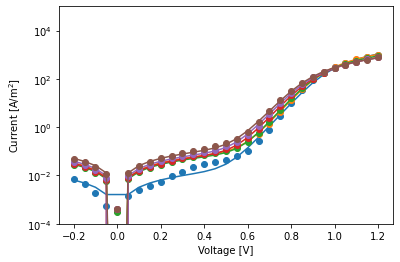

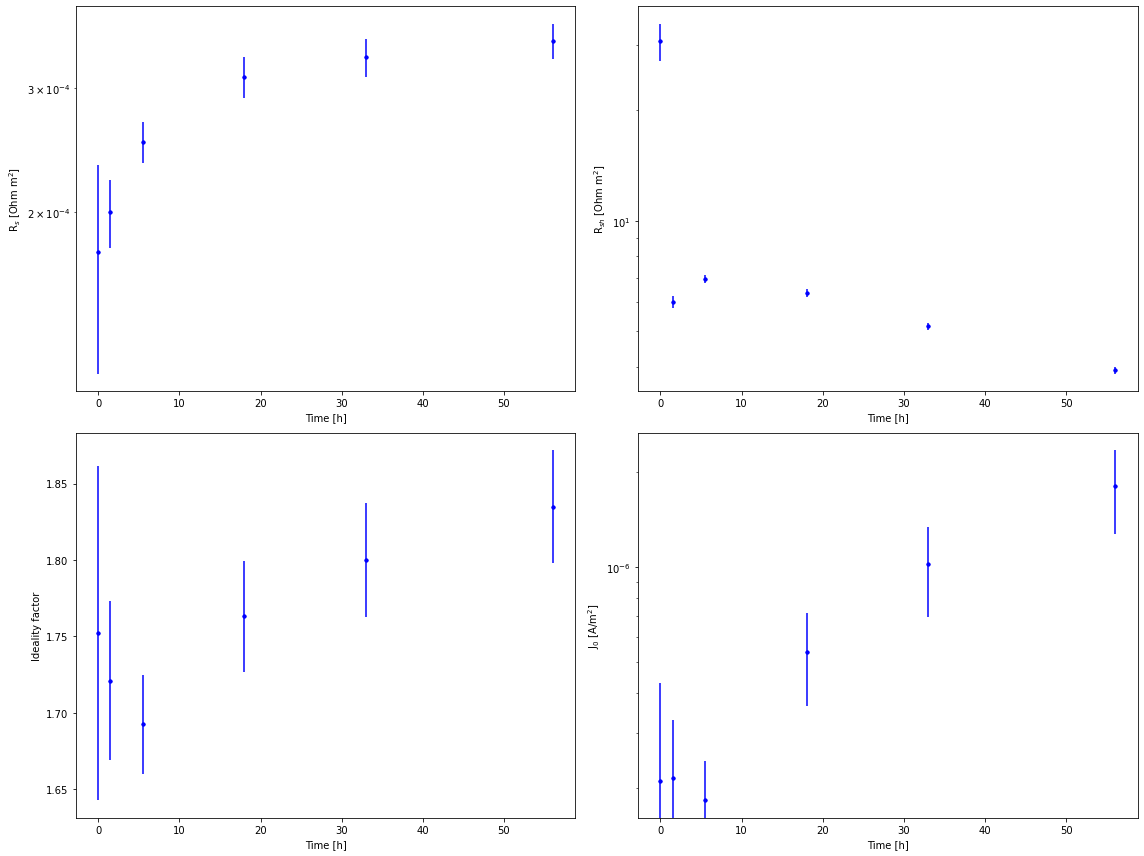

In [5]:

time2fit = ['0.000000E+0','1.500000E+0','5.500000E+0','1.800100E+1','3.300200E+1','5.600300E+1']

Rs, Rsh, J0, n, errRs, errRsh, errJ0, errn = [],[],[],[],[],[],[],[]
idx = 0 
for i in time2fit:
    df = pd.read_csv(os.path.join(FolderName,'PM6Y6_dark_t_'+i+'.txt'),delim_whitespace=True) # read data

    V = np.asarray(df['V'])
    J = np.asarray(df['J'])

    # Fit the non ideal diode equation
    res = FitNonIdealDiode(V,J,T=300,JV_type='dark',take_log=True,bounds=([1e-20, 0.8, 1e-8, 1e-3], [1e-3, 3, 1e2, 1e8]),p_start={'J0':1e-6})
    Rs.append(res['Rs'])
    Rsh.append(res['Rsh'])
    J0.append(res['J0'])
    n.append(res['n'])
    errRs.append(res['Rs_err'])
    errRsh.append(res['Rsh_err'])
    errJ0.append(res['J0_err'])
    errn.append(res['n_err'])
    t = np.asarray(time2fit)

    
    plt.plot(V,abs(J),'o',c='C'+str(idx))
    plt.semilogy(V,abs(NonIdealDiode_dark(V,res['J0'],res['n'],res['Rs'],res['Rsh'])),c='C'+str(idx))
    idx += 1
plt.xlabel('Voltage [V]')
plt.ylabel('Current [A/m$^2$]')
plt.ylim(1e-4,1e5)
plt.show()

t = t.astype(float)

fig, axs = plt.subplots(2, 2, figsize=(16,12))
axs[0, 0].errorbar(t, Rs, yerr=errRs, fmt='b.')
axs[0, 0].semilogy(t, Rs, 'b.', label='Rs')
axs[0, 0].set_xlabel('Time [h]')
axs[0, 0].set_ylabel('R$_s$ [Ohm m$^2$]')

axs[0, 1].errorbar(t, Rsh, yerr=errRsh, fmt='b.')
axs[0, 1].semilogy(t, Rsh, 'b.', label='Rsh')
axs[0, 1].set_xlabel('Time [h]')
axs[0, 1].set_ylabel('R$_{sh}$ [Ohm m$^2$]')

axs[1, 0].errorbar(t, n, yerr=errn, fmt='b.')
axs[1, 0].plot(t, n, 'b.', label='n')
axs[1, 0].set_xlabel('Time [h]')
axs[1, 0].set_ylabel('Ideality factor')

axs[1, 1].errorbar(t, J0, yerr=errJ0, fmt='b.')
axs[1, 1].semilogy(t, J0, 'b.', label='J0')
axs[1, 1].set_xlabel('Time [h]')
axs[1, 1].set_ylabel('J$_0$ [A/m$^2$]')

plt.tight_layout()
plt.show()
